In [18]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import torch

from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image

In [19]:
# Load the Faster R-CNN model with ResNet-50 as backbone (pre-trained on COCO)
model = fasterrcnn_resnet50_fpn(pretrained=True,weights='DEFAULT') #COCO_V1
model.eval()  # Mode évaluation
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [ ]:
# Load a sample image
image_path = './assets/image.jpg'  
image = Image.open(image_path).convert("RGB")

In [21]:
# Transform the image to match the input format expected by the model
image_tensor = F.to_tensor(image)  # Convert the image to tensor
images = [image_tensor]  # The model expects a list of images

In [22]:
# Make a prediction
with torch.no_grad():
    predictions = model(images)

# Display the predictions
boxes = predictions[0]['boxes']
labels = predictions[0]['labels']
scores = predictions[0]['scores']

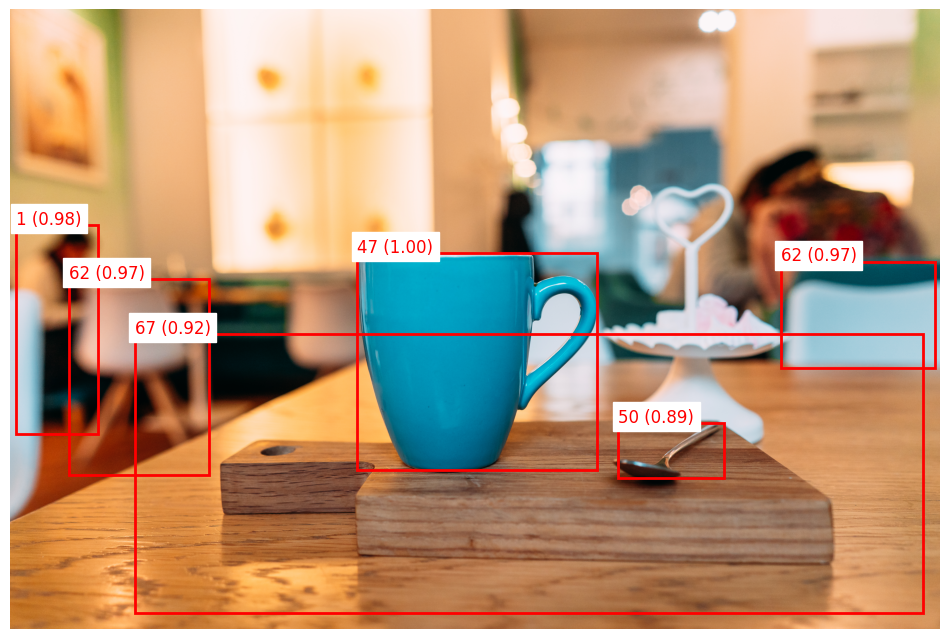

In [23]:
# Display the image and boxes
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

# Add bounding boxes
for idx, box in enumerate(boxes):
    if scores[idx] > 0.8:  # Display only high confidence predictions (score > 0.8)
        x1, y1, x2, y2 = box
        width = x2 - x1
        height = y2 - y1
        
        # Create a rectangle for each bounding box
        rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        
        # Add label and score
        ax.text(x1, y1 - 10, f'{labels[idx].item()} ({scores[idx]:.2f})', color='red', fontsize=12, backgroundcolor='white')
plt.axis('off')
plt.show()